## Support Vector Machines
Let's now look at how we can go about implementing one of the topics discussed: Support Vector Machines

In [1]:
# Import the relevant libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

plt.rcParams["figure.figsize"] = (6, 5)
np.random.seed(42)


In [2]:
# Creating the dataset for us to perform SVM on

X, y = make_blobs(
    n_samples=120,
    centers=2,
    cluster_std=1.2,
    random_state=42
)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("First 5 samples:\n", X[:5])


X shape: (120, 2)
y shape: (120,)
First 5 samples:
 [[-2.11168151 10.18494028]
 [-3.23124556 11.23701995]
 [-4.57909902  8.33954109]
 [-3.83679959  7.57883818]
 [ 5.25792116  2.58971283]]


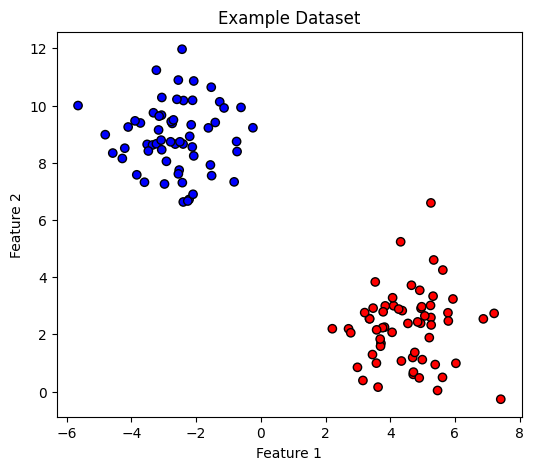

In [3]:
# A good rule of thumb when tackling any problem is to first get a sense of how the dataset is structured and how it looks like

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Example Dataset")
plt.show()


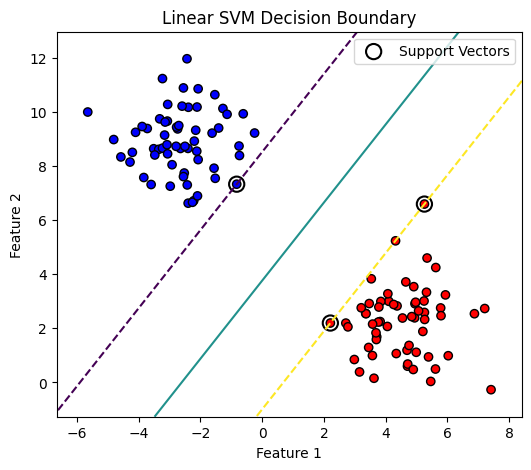

Number of support vectors: 3


In [4]:
# Train SVM classifier
model = SVC(kernel="linear", C=1.0)
model.fit(X, y)

# Create grid for decision boundary (and its visualisation)
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid)
Z = Z.reshape(xx.shape)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"])
plt.scatter(
    model.support_vectors_[:,0],
    model.support_vectors_[:,1],
    s=120, facecolors="none", edgecolors="k", linewidths=1.5,
    label="Support Vectors"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Decision Boundary")
plt.legend()
plt.show()

print("Number of support vectors:", len(model.support_vectors_))


## Do It Yourself!


In [5]:
# DIY dataset (non-linearly separable)

X_diy, y_diy = make_moons(n_samples=150, noise=0.15, random_state=42)

print("X_diy shape:", X_diy.shape)
print("y_diy shape:", y_diy.shape)


X_diy shape: (150, 2)
y_diy shape: (150,)


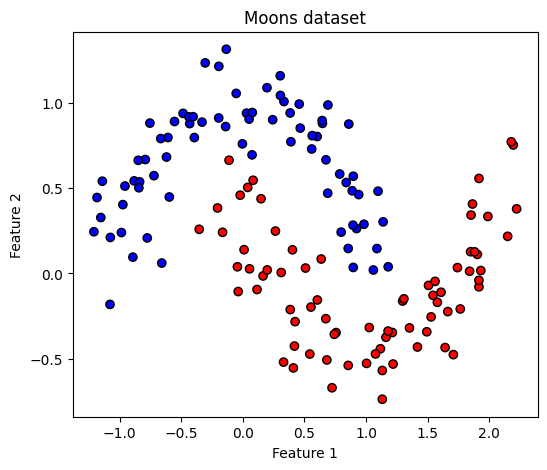

In [6]:
# Visualize X_diy similar to the example above.

# Write your code below
plt.scatter(X_diy[:, 0], X_diy[:, 1], c=y_diy, cmap="bwr", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons dataset")
plt.show()


Accuracy : 0.9933333333333333


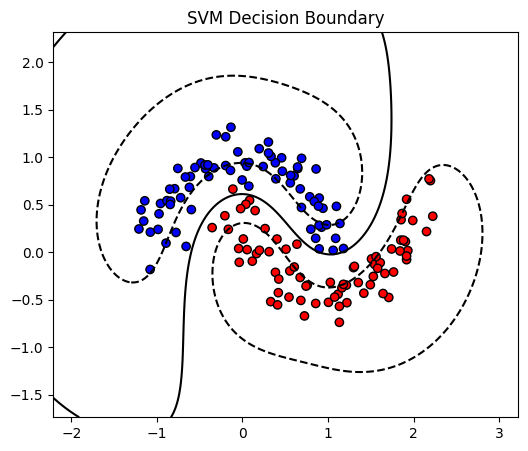

In [7]:
# Create an SVM classifier
# Train it on (X_diy, y_diy)
# Measure accuracy
# (Optional) visualize decision boundary

# Hints:
# - Try different kernels: "linear", "rbf", "poly"
# - Look at how the boundary changes

# Write your code below
model = SVC(kernel="rbf", C=1.0)
model.fit(X_diy, y_diy)
prediction = model.predict(X_diy)
print(f"Accuracy : {accuracy_score(y_diy,prediction)}")
xx, yy = np.meshgrid(
    np.linspace(X_diy[:,0].min()-1, X_diy[:,0].max()+1, 300),
    np.linspace(X_diy[:,1].min()-1, X_diy[:,1].max()+1, 300)
)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z =Z.reshape(xx.shape)

plt.scatter(X_diy[:, 0], X_diy[:, 1], c=y_diy, cmap="bwr", edgecolors="k")
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
plt.title("SVM Decision Boundary")
plt.show()




## BONUS

Did you know that SVM is not just limited to classification?

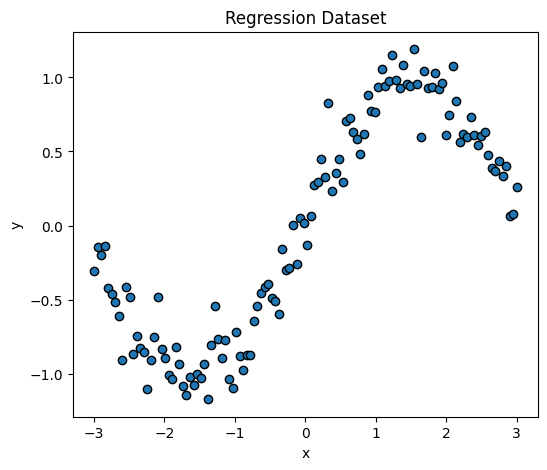

In [8]:
# Here is a dataset you can perform regression on
# Go nuts

X_reg = np.linspace(-3, 3, 120).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + 0.15 * np.random.randn(120)

plt.scatter(X_reg, y_reg, edgecolors="k")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression Dataset")
plt.show()

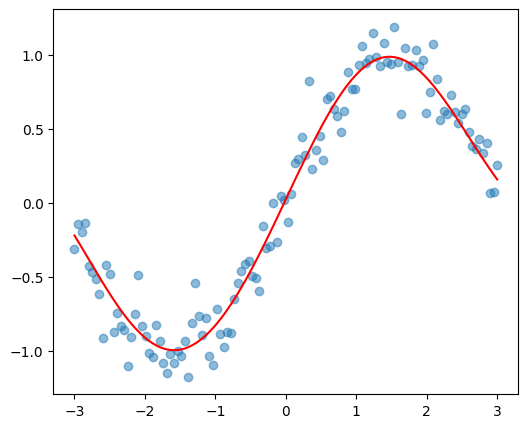

In [9]:
# A very valid question : Can SVMs perform regression?
# Try to fit an SVM regressor to this dataset.

# Fit a model
# Plot predicted curve
# Compute regression error

# Hints:
# - The class name is not SVC.
# - what does "margin" mean in regression?

# Write your code below

svr = SVR(kernel="rbf")
svr.fit(X_reg,y_reg)
y_pred = svr.predict(X_reg)

plt.scatter(X_reg,y_reg,alpha=0.5)
plt.plot(X_reg,y_pred,color='red')
plt.show()
